In [1]:
import tensorflow as tf # install tensorflow

In [2]:
# define the image size and batch size
img_size = (40, 40)
batch_size = 32

# Path to your dataset folder 


data_dir = "C:/Users/EMIL/Desktop/Rezised 40X40 dataset"

In [3]:
# use image_dataset_from_directory to load the data and split it into training and testing sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.15,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)


Found 18135 files belonging to 8 classes.
Using 15415 files for training.
Found 18135 files belonging to 8 classes.
Using 2720 files for validation.


In [4]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7']
Number of classes: 8


In [5]:
# convert images to grayscale
def grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

train_ds = train_ds.map(grayscale)
val_ds = val_ds.map(grayscale)

# normalize pixel values to be between 0 and 1
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [6]:
# create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 4, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# The neural network architecture consists of sequential layers, where the output of one layer is passed as input to the next layer.

# The first layer is a convolutional layer with 16 filters of size 3x3, followed by a ReLU activation function. 
# The input shape of the layer is (40, 40, 1), which means that the layer expects input images of size 40x40 with one color channel (grayscale).

# The second layer is a max pooling layer that reduces the spatial dimensions of the output from the previous layer by taking the maximum value in each 2x2 window.

# The third layer is another convolutional layer with 32 filters of size 3x3, followed by a ReLU activation function.

# The fourth layer is another max pooling layer.

# The fifth layer is a flatten layer that flattens the output from the previous layer into a 1D vector.

# The sixth layer is a dense layer with 64 units and a ReLU activation function.

# The seventh and final layer is a dense layer with num_classes units and a softmax activation function, which produces the predicted class probabilities for the input image.

In [7]:
# For visualizing the model

from keras.utils.vis_utils import plot_model
plot_model(model, 
           to_file='model.png',
           show_shapes=True,
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=300,
           layer_range=None,
           show_layer_activations=True
          )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
# train the model
history= model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20


c:\Users\EMIL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


482/482 [==============================] - 156s 313ms/step - loss: 1.0059 - accuracy: 0.6564 - val_loss: 0.3741 - val_accuracy: 0.8938
Epoch 2/20
482/482 [==============================] - 32s 66ms/step - loss: 0.2459 - accuracy: 0.9282 - val_loss: 0.2155 - val_accuracy: 0.9371
Epoch 3/20
482/482 [==============================] - 29s 60ms/step - loss: 0.1306 - accuracy: 0.9633 - val_loss: 0.1346 - val_accuracy: 0.9607
Epoch 4/20
482/482 [==============================] - 34s 71ms/step - loss: 0.0844 - accuracy: 0.9761 - val_loss: 0.0991 - val_accuracy: 0.9721
Epoch 5/20
482/482 [==============================] - 28s 58ms/step - loss: 0.0504 - accuracy: 0.9870 - val_loss: 0.0914 - val_accuracy: 0.9739
Epoch 6/20
482/482 [==============================] - 32s 67ms/step - loss: 0.0344 - accuracy: 0.9904 - val_loss: 0.0879 - val_accuracy: 0.9732
Epoch 7/20
482/482 [==============================] - 37s 76ms/step - loss: 0.0255 - accuracy: 0.9927 - val_loss: 0.1351 - val_accuracy: 0.9640
E

In [10]:
loss, accuracy = model.evaluate(val_ds, verbose=0)

print(f'Testing accuracy: {(accuracy*100):.2f}%')

Testing accuracy: 97.83%


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

In [12]:
model.save('MP.h5')

In [13]:
# for loading the Model 
"""     
import tensorflow as tf
import numpy as np
history = tf.keras.models.load_model("MP.h5") # pre-trained model
"""

'     \nimport tensorflow as tf\nimport numpy as np\nhistory = tf.keras.models.load_model("MP.h5") # pre-trained model\n'

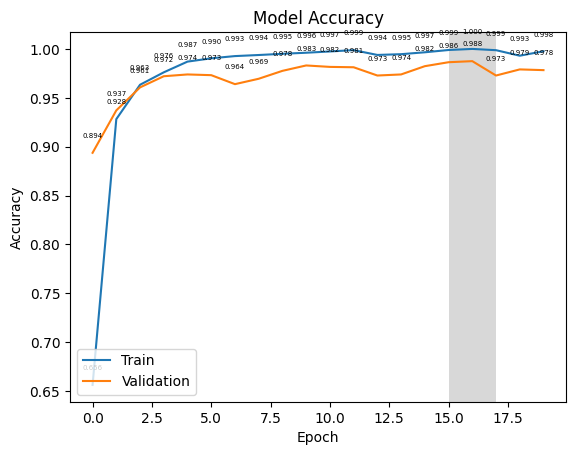

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower left')

# Add annotations to display y-axis values at the top of each point
for i, acc in enumerate(history.history['accuracy']):
    plt.annotate('{:.3f}'.format(acc), (i, acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)
for i, val_acc in enumerate(history.history['val_accuracy']):
    plt.annotate('{:.3f}'.format(val_acc), (i, val_acc), xytext=(0, 10), textcoords='offset points', ha='center', va='bottom', fontsize=5)

# Find epoch with highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])

# Highlight region around best epoch
plt.axvspan(best_epoch - 1, best_epoch + 1, facecolor='gray', alpha=0.3)    

plt.show()
